# First CNN Network

In [1]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py


from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history1 = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score1 = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 196s 3ms/step - loss: 0.2546 - acc: 0.9224 - val_loss: 0.0599 - val_acc: 0.9801
Epoch 2/12
60000/60000 [==============================] - 195s 3ms/step - loss: 0.0863 - acc: 0.9743 - val_loss: 0.0406 - val_acc: 0.9848
Epoch 3/12
60000/60000 [==============================] - 194s 3ms/step - loss: 0.0662 - acc: 0.9802 - val_loss: 0.0347 - val_acc: 0.9884
Epoch 4/12
60000/60000 [==============================] - 193s 3ms/step - loss: 0.0541 - acc: 0.9840 - val_loss: 0.0361 - val_acc: 0.9878
Epoch 5/12
60000/60000 [==============================] - 194s 3ms/step - loss: 0.0464 - acc: 0.9863 - val_loss: 0.0282 - val_acc: 0.9903
Epoch 6/12
60000/60000 [==============================] - 193s 3ms/step - loss: 0.0415 - acc: 0.9874 - val_loss: 0.0367 - 

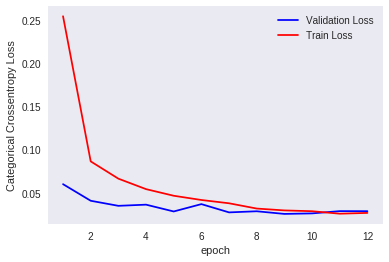

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history1.history['val_loss']
ty = history1.history['loss']
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()
plt_dynamic(x, vy, ty, ax)

# Second CNN Network

In [3]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history2 = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score2 = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 735s 12ms/step - loss: 0.3734 - acc: 0.8841 - val_loss: 0.0653 - val_acc: 0.9808
Epoch 2/12
60000/60000 [==============================] - 730s 12ms/step - loss: 0.0819 - acc: 0.9772 - val_loss: 0.0358 - val_acc: 0.9877
Epoch 3/12
60000/60000 [==============================] - 730s 12ms/step - loss: 0.0579 - acc: 0.9843 - val_loss: 0.0370 - val_acc: 0.9889
Epoch 4/12
60000/60000 [==============================] - 734s 12ms/step - loss: 0.0455 - acc: 0.9870 - val_loss: 0.0349 - val_acc: 0.9896
Epoch 5/12
60000/60000 [==============================] - 732s 12ms/step - loss: 0.0376 - acc: 0.9893 - val_loss: 0.0250 - val_acc: 0.9919
Epoch 6/12
60000/60000 [==============================] - 736s 12ms/step - loss: 0.0328 - acc: 0.9911 - val_loss: 0.0240 - val_acc: 0.9934
Epoch 7/12
60000/60000 [===================

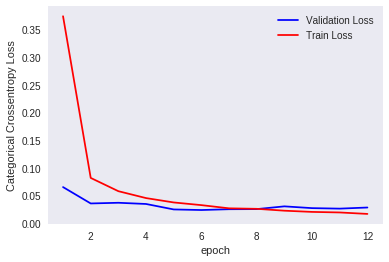

In [5]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history2.history['val_loss']
ty = history2.history['loss']
plt_dynamic(x, vy, ty, ax)


# Third CNN Network

In [6]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(2, 2),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(Dropout(0.25))
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history3 = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score3 = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score3[0])
print('Test accuracy:', score3[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 548s 9ms/step - loss: 0.3128 - acc: 0.9041 - val_loss: 0.0617 - val_acc: 0.9817
Epoch 2/12
60000/60000 [==============================] - 546s 9ms/step - loss: 0.0970 - acc: 0.9720 - val_loss: 0.0554 - val_acc: 0.9833
Epoch 3/12
60000/60000 [==============================] - 549s 9ms/step - loss: 0.0692 - acc: 0.9799 - val_loss: 0.0420 - val_acc: 0.9898
Epoch 4/12
60000/60000 [==============================] - 549s 9ms/step - loss: 0.0580 - acc: 0.9827 - val_loss: 0.0306 - val_acc: 0.9911
Epoch 5/12
60000/60000 [==============================] - 551s 9ms/step - loss: 0.0485 - acc: 0.9852 - val_loss: 0.0286 - val_acc: 0.9900
Epoch 6/12
60000/60000 [==============================] - 550s 9ms/step - loss: 0.0432 - acc: 0.9869 - val_loss: 0.0258 - val_acc: 0.9921
Epoch 7/12
60000/60000 [=========================

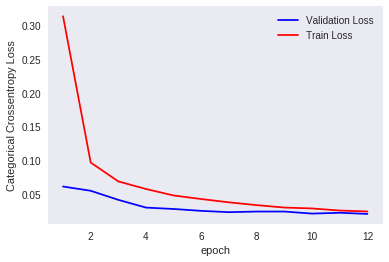

In [7]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history3.history['val_loss']
ty = history3.history['loss']
plt_dynamic(x, vy, ty, ax)


# Conclusion

In [12]:
# Text Table
from texttable import Texttable
t = Texttable()
t.add_rows([['Architecture', 'Test Loss', 'Test Accuracy'], ['3 Layer Architecture', score1[0], score1[1]], ['5 Layer Architecture', score2[0], score2[1]], ['7 Layer Architecture', score3[0], score3[1]]])
print(t.draw())


+----------------------+-----------+---------------+
|     Architecture     | Test Loss | Test Accuracy |
+======================+===========+===============+
| 3 Layer Architecture | 0.029     | 0.991         |
+----------------------+-----------+---------------+
| 5 Layer Architecture | 0.028     | 0.993         |
+----------------------+-----------+---------------+
| 7 Layer Architecture | 0.021     | 0.993         |
+----------------------+-----------+---------------+


Thus increasing the number of layers could improve the performance sometimes.